<a href="https://colab.research.google.com/github/mryamaho/MLprojects/blob/main/BankLoanDEFAULTERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np #for mathematic formulas
import pandas as pd #to process data

In [2]:
path = "/content/drive/MyDrive/Colab Notebooks/Group Assignment 1/data.csv"

data = pd.read_csv(path) #we create a var called data that reads in the dataset uploaded onto gdrive
#we also use the pandas library to read in the dataset

<ipython-input-2-e0bd7f092eb9>:3: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path) #we create a var called data that reads in the dataset uploaded onto gdrive


In [3]:
data #calling in to view the data that we have uploaded

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,36371250,39102635,10000,10000,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN,0
855965,36441262,39152692,24000,24000,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,0
855966,36271333,38982739,13000,13000,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN,0
855967,36490806,39222577,12000,12000,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN,0


///////////// DATA DISCOVERY AND EXPLORATION ////////////////



In [4]:
#since the target variable of this assignment is to find out which customer is going to default
#the first thing we need to find out is what columns we are able to work with
for col in data.columns:
    print(col)


id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
pymnt_plan
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
default_ind


In [5]:
#after going through the columns and analysing it, we decide that we will use these specific columns to conduct our analysis
data1 = data[["loan_amnt", "term", "installment", "int_rate", "grade", "emp_length", "home_ownership", "annual_inc", "verification_status", "purpose", "dti", "delinq_2yrs", "revol_util", "total_acc", "pub_rec", "default_ind"]]

#calling the dataset in again to see it with the updated columns
data1

,loan_amnt,term,installment,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,revol_util,total_acc,pub_rec,default_ind
0,5000,36 months,162.87,10.65,B,10+ years,RENT,24000.0,Verified,credit_card,27.65,0,83.7,9,0,0
1,2500,60 months,59.83,15.27,C,< 1 year,RENT,30000.0,Source Verified,car,1.00,0,9.4,4,0,1
2,2400,36 months,84.33,15.96,C,10+ years,RENT,12252.0,Not Verified,small_business,8.72,0,98.5,10,0,0
3,10000,36 months,339.31,13.49,C,10+ years,RENT,49200.0,Source Verified,other,20.00,0,21.0,37,0,0
4,3000,60 months,67.79,12.69,B,1 year,RENT,80000.0,Source Verified,other,17.94,0,53.9,38,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,10000,36 months,332.10,11.99,B,8 years,RENT,31000.0,Verified,debt_consolidation,28.69,0,82.1,15,1,0
855965,24000,36 months,797.03,11.99,B,10+ years,MORTGAGE,79000.0,Verified,home_improvement,3.90,0,84.5,23,0,0
855966,13000,60 months,316.07,15.99,D,5 years,RENT,35000.0,Verified,debt_consolidation,30.90,0,61.3,22,1,0
855967,12000,60 months,317.86,19.99,E,1 year,RENT,64400.0,Source Verified,debt_consolidation,27.19,1,30.6,20,0,0


In [6]:
#we also want to see what else we can derive so far from the data set given
#data1.info()
data1.head().T

,0,1,2,3,4
loan_amnt,5000,2500,2400,10000,3000
term,36 months,60 months,36 months,36 months,60 months
installment,162.87,59.83,84.33,339.31,67.79
int_rate,10.65,15.27,15.96,13.49,12.69
grade,B,C,C,C,B
emp_length,10+ years,< 1 year,10+ years,10+ years,1 year
home_ownership,RENT,RENT,RENT,RENT,RENT
annual_inc,24000.0,30000.0,12252.0,49200.0,80000.0
verification_status,Verified,Source Verified,Not Verified,Source Verified,Source Verified
purpose,credit_card,car,small_business,other,other


<Axes: xlabel='default_ind', ylabel='count'>

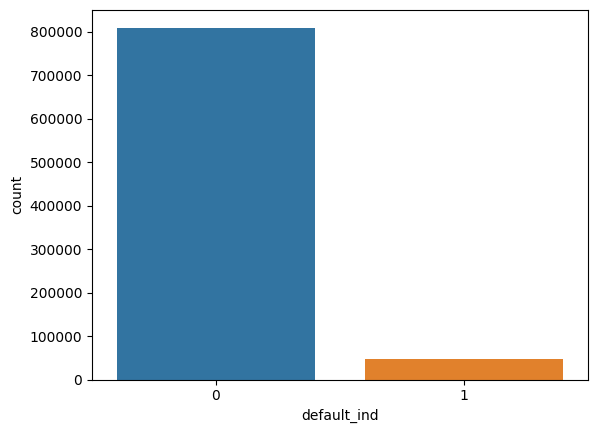

In [7]:
import seaborn as sns
#we want to see how many is defaulted
sns.countplot( x = "default_ind" , data = data1)

In [8]:
data1["default_ind"].value_counts()*100/len(data1)

0    94.571416
1     5.428584
Name: default_ind, dtype: float64

from this percentage point we can tell that our dataset is highly imbalanced in a sense that 95% of the dataset is non defaulted and only 5% has defaulted

In [9]:
import matplotlib as plt

<Axes: xlabel='loan_amnt', ylabel='Count'>

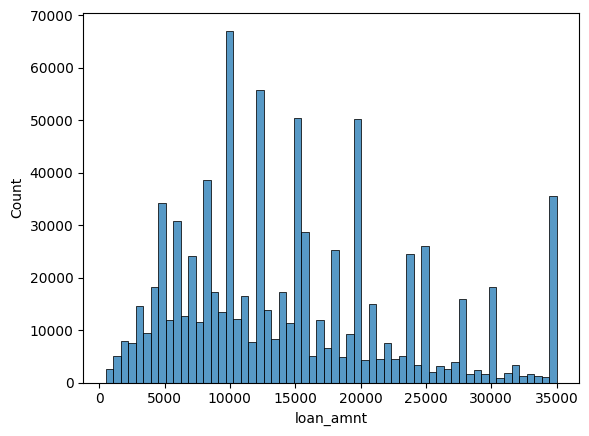

In [10]:
sns.histplot(data1["loan_amnt"] , bins = 60)

from this histogram we can tell that it has right askewed distribution

<ipython-input-11-d64e877ebf01>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr(), annot=True, cmap="viridis")


<Axes: >

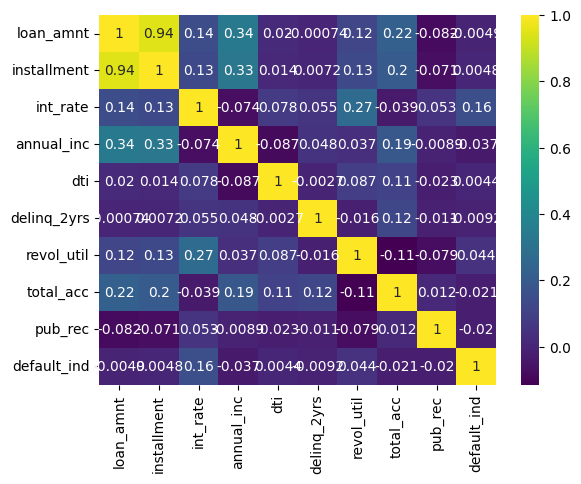

In [11]:
sns.heatmap(data1.corr(), annot=True, cmap="viridis")
#from here on we can see that there is a high correlation between installment and loan amount

<Axes: xlabel='installment', ylabel='loan_amnt'>

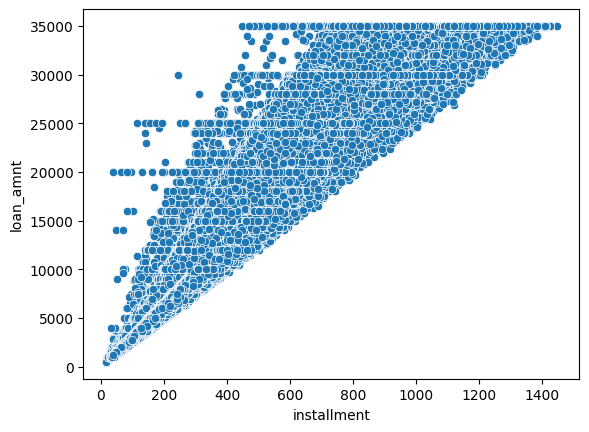

In [12]:
sns.scatterplot( x = "installment", y = "loan_amnt" , data = data1)

<Axes: xlabel='default_ind', ylabel='loan_amnt'>

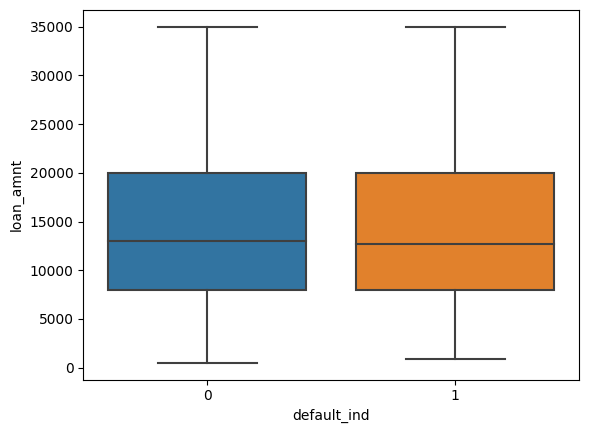

In [13]:
sns.boxplot( x = "default_ind", y = "loan_amnt", data = data1)
#from the box plot graph, we can see that the median amount is almost equal, so we can rule out that the loan amount is not a good factor in
#determining the default rate

In [14]:
data1.groupby("default_ind")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
default_ind,,,,,,,,
0,809502.0,14755.476206,8427.151810,500.0,8000.0,13000.0,20000.0,35000.0
1,46467.0,14573.018486,8391.928489,900.0,8000.0,12700.0,20000.0,35000.0



/////////////////////////////// DATA PREPARATION //////////////////////

In [15]:
#from here on we have visualized the data and have decided on the columns that we will use for as the predictors
#since this is a classification problem, the likely machine learning model that we should use is going to be Logistical regression
data1['term'] = data1['term'].astype('category')
data1['term'] = data1['term'].cat.codes
data1

<ipython-input-15-108d03319aa8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['term'] = data1['term'].astype('category')
<ipython-input-15-108d03319aa8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['term'] = data1['term'].cat.codes


,loan_amnt,term,installment,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,revol_util,total_acc,pub_rec,default_ind
0,5000,0,162.87,10.65,B,10+ years,RENT,24000.0,Verified,credit_card,27.65,0,83.7,9,0,0
1,2500,1,59.83,15.27,C,< 1 year,RENT,30000.0,Source Verified,car,1.00,0,9.4,4,0,1
2,2400,0,84.33,15.96,C,10+ years,RENT,12252.0,Not Verified,small_business,8.72,0,98.5,10,0,0
3,10000,0,339.31,13.49,C,10+ years,RENT,49200.0,Source Verified,other,20.00,0,21.0,37,0,0
4,3000,1,67.79,12.69,B,1 year,RENT,80000.0,Source Verified,other,17.94,0,53.9,38,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,10000,0,332.10,11.99,B,8 years,RENT,31000.0,Verified,debt_consolidation,28.69,0,82.1,15,1,0
855965,24000,0,797.03,11.99,B,10+ years,MORTGAGE,79000.0,Verified,home_improvement,3.90,0,84.5,23,0,0
855966,13000,1,316.07,15.99,D,5 years,RENT,35000.0,Verified,debt_consolidation,30.90,0,61.3,22,1,0
855967,12000,1,317.86,19.99,E,1 year,RENT,64400.0,Source Verified,debt_consolidation,27.19,1,30.6,20,0,0


In [16]:
data1['grade'] = data1['grade'].astype('category')
data1['grade'] = data1['grade'].cat.codes
data1

<ipython-input-16-e34fdfc7aa1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['grade'] = data1['grade'].astype('category')
<ipython-input-16-e34fdfc7aa1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['grade'] = data1['grade'].cat.codes


,loan_amnt,term,installment,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,revol_util,total_acc,pub_rec,default_ind
0,5000,0,162.87,10.65,1,10+ years,RENT,24000.0,Verified,credit_card,27.65,0,83.7,9,0,0
1,2500,1,59.83,15.27,2,< 1 year,RENT,30000.0,Source Verified,car,1.00,0,9.4,4,0,1
2,2400,0,84.33,15.96,2,10+ years,RENT,12252.0,Not Verified,small_business,8.72,0,98.5,10,0,0
3,10000,0,339.31,13.49,2,10+ years,RENT,49200.0,Source Verified,other,20.00,0,21.0,37,0,0
4,3000,1,67.79,12.69,1,1 year,RENT,80000.0,Source Verified,other,17.94,0,53.9,38,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,10000,0,332.10,11.99,1,8 years,RENT,31000.0,Verified,debt_consolidation,28.69,0,82.1,15,1,0
855965,24000,0,797.03,11.99,1,10+ years,MORTGAGE,79000.0,Verified,home_improvement,3.90,0,84.5,23,0,0
855966,13000,1,316.07,15.99,3,5 years,RENT,35000.0,Verified,debt_consolidation,30.90,0,61.3,22,1,0
855967,12000,1,317.86,19.99,4,1 year,RENT,64400.0,Source Verified,debt_consolidation,27.19,1,30.6,20,0,0


In [17]:
data1['emp_length'] = data1['emp_length'].astype('category')
data1['emp_length'] = data1['emp_length'].cat.codes

data1['home_ownership'] = data1['home_ownership'].astype('category')
data1['home_ownership'] = data1['home_ownership'].cat.codes

data1['verification_status'] = data1['verification_status'].astype('category')
data1['verification_status'] = data1['verification_status'].cat.codes

data1['purpose'] = data1['purpose'].astype('category')
data1['purpose'] = data1['purpose'].cat.codes
data1

<ipython-input-17-3266177dbc1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['emp_length'] = data1['emp_length'].astype('category')
<ipython-input-17-3266177dbc1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['emp_length'] = data1['emp_length'].cat.codes
<ipython-input-17-3266177dbc1d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

,loan_amnt,term,installment,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,revol_util,total_acc,pub_rec,default_ind
0,5000,0,162.87,10.65,1,1,5,24000.0,2,1,27.65,0,83.7,9,0,0
1,2500,1,59.83,15.27,2,10,5,30000.0,1,0,1.00,0,9.4,4,0,1
2,2400,0,84.33,15.96,2,1,5,12252.0,0,11,8.72,0,98.5,10,0,0
3,10000,0,339.31,13.49,2,1,5,49200.0,1,9,20.00,0,21.0,37,0,0
4,3000,1,67.79,12.69,1,0,5,80000.0,1,9,17.94,0,53.9,38,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,10000,0,332.10,11.99,1,8,5,31000.0,2,2,28.69,0,82.1,15,1,0
855965,24000,0,797.03,11.99,1,1,1,79000.0,2,4,3.90,0,84.5,23,0,0
855966,13000,1,316.07,15.99,3,5,5,35000.0,2,2,30.90,0,61.3,22,1,0
855967,12000,1,317.86,19.99,4,0,5,64400.0,1,2,27.19,1,30.6,20,0,0


In [18]:
#now that we have converted all non integer values into integer, we can try to fit it onto a our chosen machine learning model which is logistical regression
data1.isnull().sum()

loan_amnt                0
term                     0
installment              0
int_rate                 0
grade                    0
emp_length               0
home_ownership           0
annual_inc               0
verification_status      0
purpose                  0
dti                      0
delinq_2yrs              0
revol_util             446
total_acc                0
pub_rec                  0
default_ind              0
dtype: int64

In [19]:
data1['revol_util'].replace(to_replace=np.nan, value=0, inplace=True)
data1

<ipython-input-19-cabc178c320c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['revol_util'].replace(to_replace=np.nan, value=0, inplace=True)


,loan_amnt,term,installment,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,revol_util,total_acc,pub_rec,default_ind
0,5000,0,162.87,10.65,1,1,5,24000.0,2,1,27.65,0,83.7,9,0,0
1,2500,1,59.83,15.27,2,10,5,30000.0,1,0,1.00,0,9.4,4,0,1
2,2400,0,84.33,15.96,2,1,5,12252.0,0,11,8.72,0,98.5,10,0,0
3,10000,0,339.31,13.49,2,1,5,49200.0,1,9,20.00,0,21.0,37,0,0
4,3000,1,67.79,12.69,1,0,5,80000.0,1,9,17.94,0,53.9,38,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,10000,0,332.10,11.99,1,8,5,31000.0,2,2,28.69,0,82.1,15,1,0
855965,24000,0,797.03,11.99,1,1,1,79000.0,2,4,3.90,0,84.5,23,0,0
855966,13000,1,316.07,15.99,3,5,5,35000.0,2,2,30.90,0,61.3,22,1,0
855967,12000,1,317.86,19.99,4,0,5,64400.0,1,2,27.19,1,30.6,20,0,0


In [20]:
data1.isnull().sum()

loan_amnt              0
term                   0
installment            0
int_rate               0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
purpose                0
dti                    0
delinq_2yrs            0
revol_util             0
total_acc              0
pub_rec                0
default_ind            0
dtype: int64

In [21]:
x = data1.drop(columns = 'default_ind')
x

,loan_amnt,term,installment,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,revol_util,total_acc,pub_rec
0,5000,0,162.87,10.65,1,1,5,24000.0,2,1,27.65,0,83.7,9,0
1,2500,1,59.83,15.27,2,10,5,30000.0,1,0,1.00,0,9.4,4,0
2,2400,0,84.33,15.96,2,1,5,12252.0,0,11,8.72,0,98.5,10,0
3,10000,0,339.31,13.49,2,1,5,49200.0,1,9,20.00,0,21.0,37,0
4,3000,1,67.79,12.69,1,0,5,80000.0,1,9,17.94,0,53.9,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,10000,0,332.10,11.99,1,8,5,31000.0,2,2,28.69,0,82.1,15,1
855965,24000,0,797.03,11.99,1,1,1,79000.0,2,4,3.90,0,84.5,23,0
855966,13000,1,316.07,15.99,3,5,5,35000.0,2,2,30.90,0,61.3,22,1
855967,12000,1,317.86,19.99,4,0,5,64400.0,1,2,27.19,1,30.6,20,0


In [22]:
y = data['default_ind']


//////////////////////////SELECTING AND TRAINING THE MODEL///////////////////

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 21)

In [25]:
x_test

,loan_amnt,term,installment,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,revol_util,total_acc,pub_rec
354093,1675,0,58.57,15.61,3,3,4,50000.0,0,1,32.57,0,71.3,28,1
480116,5500,0,185.80,13.18,2,-1,5,18500.0,2,2,24.72,0,32.3,21,0
330169,24000,0,735.47,6.49,0,10,1,70000.0,1,2,28.97,0,75.8,21,0
109446,20000,1,560.37,22.70,4,-1,1,68220.0,1,2,22.18,0,82.7,44,1
847864,12825,0,436.22,13.66,2,10,1,35000.0,2,2,21.81,0,53.0,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853519,35000,0,1107.63,8.67,1,8,1,142000.0,2,2,19.76,0,63.0,39,0
19131,6400,1,169.96,20.11,6,3,1,18000.0,2,2,6.33,0,92.7,4,0
788408,6000,0,197.95,11.53,1,8,5,30000.0,1,1,30.30,0,28.5,22,0
208992,10000,0,340.18,13.67,1,4,5,38000.0,1,2,15.13,0,68.5,5,0


In [26]:
#as we can see now that we have managed to change all of our non integer values to integer, we have a new problem where all these values are not really according
#to scale so this could impact our target variable. to make it all to scale we will be using a tool from the scikit library called standard scaler
from sklearn.preprocessing import StandardScaler

///////////////FINE TUNING THE MODEL//////////////

In [27]:
scaler = StandardScaler()

In [28]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
#over here we use the standard scaler tool to scale our training data, as you can see we did not fit the test data
#this is because when we try to fit the data, it calculates the mean and Std of our dataset because the formula that the fit method uses is
# z = (x - u) / s and we only want the training data to calculate the parameters of mean and std. so we dont want our test data to know the mean and std


In [29]:
x_train_scaled #looking at how our scaled fit data looks, as you can see its not huge unlike when we use

array([[-0.56402043, -0.65335079, -0.41420759, ..., -2.20902285,
        -0.8684843 ,  1.38147325],
       [ 0.02923917,  1.53057134, -0.30662804, ..., -0.98433275,
        -0.36119417,  1.38147325],
       [ 0.02923917, -0.65335079,  0.16369398, ..., -0.66138365,
        -0.27664582, -0.33364656],
       ...,
       [ 0.62249876,  1.53057134,  0.09045619, ..., -0.14550391,
         2.42890151, -0.33364656],
       [-0.56402043, -0.65335079, -0.3816301 , ..., -0.08259175,
        -0.78393594, -0.33364656],
       [ 0.91912856,  1.53057134,  0.17046386, ...,  0.96594429,
         0.48428937, -0.33364656]])

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
log_reg = LogisticRegression(random_state = 0).fit(x_train_scaled, y_train) #so the training model is done
#now to check if we can predict

In [32]:
log_reg.predict(x_train_scaled)

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
log_reg.score(x_train_scaled, y_train)

0.9457544448906575

In [34]:
#so we can see that our training data and our columns that we chose to use as predictors landed us a 94% accuracy
#i really did not expect it to do this well actually so now that our model has shown proof that it's able to accurately predict
#it's time to test it on our test data
log_reg.score(x_test_scaled, y_test)


0.9455296330478872

In [36]:
#wah solid we got a solid model good job guys. the decision to use those columns as our predictors turned out really really well
#as per assignment requirements we will now explore different models and see if they're better than our logistical regression model ok?
#the first one we are going to check will be decision tree, lets see how it works
from sklearn import tree

In [37]:
Dtree = tree.DecisionTreeClassifier()

In [38]:
Dtree.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [42]:
Dtree.score(x_train_scaled, y_train)

1.0

In [44]:
#as expected, when using a decision tree, the score when it we train it with the training set will usually be 1 or close to 1.
#When a decision tree is trained on the training set, it learns the optimal decision tree for that specific dataset. This means that the decision tree will be able to perfectly predict the class of any data point in the training set. This is why decision trees often give a score of 1 when they are used to evaluate the training set.
#now let's see how it fairs for our test set
Dtree.score(x_test_scaled, y_test)

0.8969590055726252

In [45]:
#we can see that it scores pretty well, now lets explore another model.
#lets try and use a class from the naive bayes which is bernoulli naive bayes
#It is a simple and easy-to-understand algorithm, relatively fast and efficient to train
import sklearn.naive_bayes as nb

# Create a Bernoulli naive Bayes model
bnb_model = nb.BernoulliNB()

In [46]:
bnb_model.fit(x_train_scaled, y_train)

BernoulliNB()

In [47]:
bnb_model.score(x_train_scaled, y_train)

0.9457559052243437

In [48]:
#now lets see how this fairs for our test data set
bnb_model.score(x_test_scaled, y_test)

0.9455471570265312

///////////////////////////evaluating the outcomes///////////

In [ ]:
#pretty good!
#HERE we can see that for our logistical regression model scored a 94.5%
#our decision tree model scored a 89%
#and our bernoulli naives bayes model scored a 94.5% as well
# from these results, we can conclude that both logistical regression and bernoulli naive bayes can be viable models for us to use for this specific dataset
#but logistical regression would be our specific choice as we have a really large dataset 800K+ and logistic regression is the least resource intensive
#as compared to bernoulli bayes.
#Logistic regression is also more accurate than Bernoulli naive Bayes for large datasets. This is because Bernoulli naive Bayes makes assumptions about the distribution of the data that may not be met for large datasets.
#Logistic regression is easier to interpret than Bernoulli naive Bayes. This means that you can understand how the model makes its predictions, which can be helpful for debugging and improving the model